# Biodiversity In National Parks

## Introduction

In this project, we will seek to discover more about the health of species that reside in the United States'
National Parks.

First we will define and scope our project. Then we can analyze our data, prepare it, plot it, and
 lastly, discuss and evaluate our findings.




- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent and what is their distribution amongst parks?



## Scoping
Whenever starting a project it is pertinent to define its boundaries and end points.
1. We will discuss our project goals and intentions.
2. We will discuss our data and its viability in achieving our objectives.
3. We will analyze our data.
4. We will evaluate and discuss our findings.

### Project Goals
The viewpoint we will be taking in this endeavor is that of a biodiversity analyst for the
National Parks Service. In order ensure the biodiversity of their parks it is necessary for the service
 to know which species are at risk and what their park distribution is.

As such, our primary goals in the project will be to answer the following questions:
- What is the distribution of conservation status for our available species?
- Are certain species more likely to be endangered?
- If differences exist between species and their conservation status, is it significant?
- What are the most prevalent species and what is their park distribution?

### Data
Our data is comprised of two csv files containing:
- `species_info.csv`: Species information including type, name, and conservation status
- `observations.csv`: Sightings of species in the past 7 days, organized by park
Given our previous questions it appears we can at least partially achieve our objectives.

### Analysis
We will utilize descriptive statistics and visualizations of the data to better understand it.
Following this, we will test the observed values for significance. Some of these metrics include:

1. Data Distribution
2. Counts
3. The Relationship Between Species
4. The Conservation Status of Various Species
5. The Observations of Species in the Parks

### Evaluation
Finally, we will revisit our previous questions and discuss the impact of our findings. Additionally, we will discuss
 the limitations of our research and investigate areas of future study.

### Imports

In [90]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from itertools import chain
import string
%matplotlib inline
# setting pandas options
pd.set_option('display.max_columns', 500)

## Data Analysis

We can start by loading in our data and checking its columns and first few rows in order to describe it.

#### species
`species_info.csv` contains information on the observed species and contains the following columns:
- **category** - The taxonomy category of a species, categorical variable
- **scientific_name** - The scientific name of each species, categorical variable
- **common_names** - The common names of each species, categorical variable
- **conservation_status** - The species conservation status, ordinal variable

#### observations
`observations.csv` details recorded sightings of different species in the parks over the past 7 days.
The columns it includes are:
- **scientific_name** - Each species scientific name, categorical variable
- **park_name** - The name of the associated national park, categorical variable
- **observations** - Observations in the past week, continuous variable

In [91]:
species = pd.read_csv('species_info.csv', encoding='utf-8')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [92]:
observations = pd.read_csv('observations.csv', encoding='utf-8')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


#### Data Characteristics
The dimensions of our data sets can tell us how much about our data.
`species` contains 5,284 rows and 4 columns and `observations` contains 23,296 rows and 3 columns.

In [93]:
print(f'Species Columns: {species.columns}')
print(f'Observations Columns: {observations.columns}')
print(f'Species Shape: {species.shape}')
print(f'Observations Shape: {observations.shape}')

Species Columns: Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')
Observations Columns: Index(['scientific_name', 'park_name', 'observations'], dtype='object')
Species Shape: (5824, 4)
Observations Shape: (23296, 3)


There are 5,541 unique species available in our data.

In [94]:
print(f'Number of species:{species.scientific_name.nunique()}')

Number of species:5541


There are 7 categories comprised of both animal and plant life.

In [95]:
## species_info.csv overview
# getting the number of categories in species
print(f'Number of categories in Species: {species.category.nunique()}')
print(f'Category types: {species.category.unique()}')

Number of categories in Species: 7
Category types: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


We see that there are 4,470 species of vascular plants and only 79 species of reptile.

In [96]:
# determining the size of each category in species
print(species.groupby('category').size())

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64


Now let's look at our primary indicator of species endangerment, `conservation status`.
There are 5 main values: `Endangered`, `In Recovery`, `Species of Concern`, `Threatened`, and `nan`.
These 5,633 values mostly consist of null entries, which in this case indicates no conservation status.

In [97]:
# conservation statues exploration
print(f'Number of conservation statuses:{species.conservation_status.nunique()}')
print(f'Conservation statuses:{species.conservation_status.unique()}')
# Note: nan values indicate species not in threat of extinction due to no conservation status
print(f'nan values: {species.conservation_status.isna().sum()}')
print(species.groupby('conservation_status').size())

Number of conservation statuses:4
Conservation statuses:[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']
nan values: 5633
conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64


The observations data contains 4 main parks: `Great Smoky Mountains National Park`,
`Yosemite National Park`, `Bryce National Park`, and `Yellowstone National Park`.
Over the past week there were 3,314,739 observations.

In [98]:
## observations.csv overview
# determining the number of parks in the set
print(f'Number of parks: {observations.park_name.nunique()}')
print(f'Unique parks: {observations.park_name.unique()}')

Number of parks: 4
Unique parks: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


In [99]:
# getting the total observations in the past week
print(f'Number of observations: {observations.observations.sum()}')

Number of observations: 3314739


### Analysis
After exploring our data we need to clean it. First we will take care of the
null values in `conservation status` by changing them to `No Concern`.

In [100]:
# changing the nan values in species to a new status 'No Concern'
species.fillna('No Concern', inplace=True)
print(species.groupby('conservation_status').size())

conservation_status
Endangered              16
In Recovery              4
No Concern            5633
Species of Concern     161
Threatened              10
dtype: int64


Since our data is now cleaned, we explore the breakdown of species in conservation status.

In [101]:
# filtering species based on status and then pivoting the table
conservationCategory = species[species.conservation_status != 'No Concern']\
	.groupby(['conservation_status', 'category'])['scientific_name']\
	.count()\
	.unstack()
print(conservationCategory)

category             Amphibian  Bird  Fish  Mammal  Nonvascular Plant  \
conservation_status                                                     
Endangered                 1.0   4.0   3.0     7.0                NaN   
In Recovery                NaN   3.0   NaN     1.0                NaN   
Species of Concern         4.0  72.0   4.0    28.0                5.0   
Threatened                 2.0   NaN   4.0     2.0                NaN   

category             Reptile  Vascular Plant  
conservation_status                           
Endangered               NaN             1.0  
In Recovery              NaN             NaN  
Species of Concern       5.0            43.0  
Threatened               NaN             2.0  


This data can be made easier to understand graphically.
We will use a stacked bar plot of conservation status vs. the number of species,
and segment each bar by species category.

Text(0, 0.5, 'Number of Species')

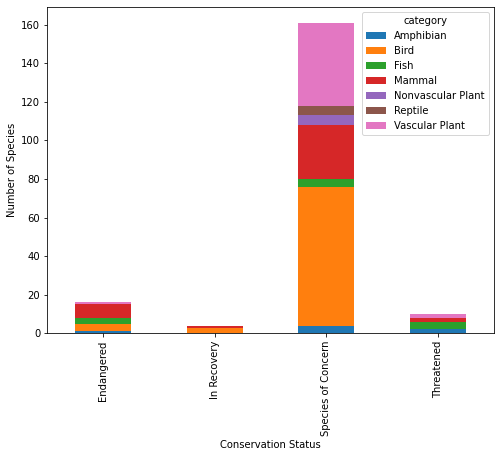

In [102]:
# visualizing species based on conservation status
ax = conservationCategory.plot(kind = 'bar', figsize=(8,6),
                               stacked=True)
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species")

### Conservation
Now we will determine if a species is more likely to be endangered in comparison to another.
First we will class species without a conservation status as `is_protected`.

In [103]:
## Are different species more likely to be protected on a per category basis?
# creating a column 'is_protected' based on exclusion of 'No Concern'
species['is_protected'] = species.conservation_status != 'No Concern'

We then use this binary classifier to show which species categories are protected by total numbers.

In [104]:
category_counts = species.groupby(['category', 'is_protected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                        .reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']
category_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


Let's also look at what percent of each category is considered `protected`.

In [105]:
# determining percent protected per category
category_counts['percent_protected'] = category_counts.protected / \
                                      (category_counts.protected + category_counts.not_protected) * 100
category_counts

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


### Statistical Significance
We will primarly be using chi-squared tests on our categorical variables to determine if
there is a significant difference between species in regards to conservation status rates.
We will be using a standard p-value cutoff of 0.05 to test our hypothesis.

When comparing `Mammal` and `Bird` we get a p-value = 0.69, far above our cutoff and thus likely independent of each other.

In [106]:
contingency1 = [
    [category_counts.at[3,'protected'], category_counts.at[3,'not_protected']],
    [category_counts.at[1,'protected'], category_counts.at[1,'not_protected']]
    ]
chi2_contingency(contingency1)

(0.1617014831654557,
 0.6875948096661336,
 1,
 array([[ 27.8313253, 148.1686747],
        [ 77.1686747, 410.8313253]]))

However, in the comparison of `Mammal` and `Reptile` we get a p-value = 0.039.
This provides evidence that when compared to reptiles, mammals are in significantly
higher need of protection.

In [107]:
contingency2 = [
    [category_counts.at[3,'protected'], category_counts.at[3,'not_protected']],
    [category_counts.at[5,'protected'], category_counts.at[5,'not_protected']]
    ]
chi2_contingency(contingency2)

(4.289183096203645,
 0.03835559022969898,
 1,
 array([[ 24.2519685, 151.7480315],
        [ 10.7480315,  67.2519685]]))

### Park Species
Now we can look at the observations recorded amongst the various parks.

From our inspection earlier it's apparent that the names need some cleaning.

In [108]:
# creating a method for taking the punctuation out of text
def del_punctuation(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
        return text

# generating basic names
common_names = species[species.category == 'Mammal']\
    .common_names\
    .apply(del_punctuation)\
    .str.split().tolist()

print(common_names[:6])

[["Gapper's", 'Red-Backed', 'Vole'], ['American', 'Bison,', 'Bison'], ['Aurochs,', 'Aurochs,', 'Domestic', 'Cattle', '(Feral),', 'Domesticated', 'Cattle'], ['Domestic', 'Sheep,', 'Mouflon,', 'Red', 'Sheep,', 'Sheep', '(Feral)'], ['Wapiti', 'Or', 'Elk'], ['White-Tailed', 'Deer']]


We also have to eliminate duplicate words in the rows, since they should
only be counted once per species.

In [109]:
cleaned_rows = []

# taking only one from each
for item in common_names:
    item = list(dict.fromkeys(item))
    # adding each to list
    cleaned_rows.append(item)

print(cleaned_rows[:6])

[["Gapper's", 'Red-Backed', 'Vole'], ['American', 'Bison,', 'Bison'], ['Aurochs,', 'Domestic', 'Cattle', '(Feral),', 'Domesticated'], ['Domestic', 'Sheep,', 'Mouflon,', 'Red', 'Sheep', '(Feral)'], ['Wapiti', 'Or', 'Elk'], ['White-Tailed', 'Deer']]


Then we collapse all the words into one list.

In [110]:
# using list comprehension
simple_list = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cleaned_rows))
print(simple_list)

["Gapper's", 'Red-Backed', 'Vole', 'American', 'Bison,', 'Bison', 'Aurochs,', 'Domestic', 'Cattle', '(Feral),', 'Domesticated', 'Domestic', 'Sheep,', 'Mouflon,', 'Red', 'Sheep', '(Feral)', 'Wapiti', 'Or', 'Elk', 'White-Tailed', 'Deer', 'Feral', 'Hog,', 'Wild', 'Pig', 'Coyote', 'Gray', 'Wolf', 'Red', 'Wolf', 'Common', 'Gray', 'Fox,', 'Fox', 'Black', 'Fox,', 'Cross', 'Red', 'Silver', 'Fox', 'Red', 'Fox', 'Mountain', 'Lion', 'Wild', 'Cat,', 'Wildcat', 'Bobcat', 'Panther', '(Mountain', 'Lion)', 'Striped', 'Skunk', 'Eastern', 'Spotted', 'Skunk', 'River', 'Otter', 'Northern', 'River', 'Otter', 'Fisher', 'Mink', '(Or', 'Weasel)', 'Long-Tailed', 'Weasel', 'Least', 'Weasel', 'Mink', 'Common', 'Raccoon,', 'Raccoon', 'Black', 'Bear', "Rafinesque's", 'Big-Eared', 'Bat', 'Big', 'Brown', 'Bat', 'Silver-Haired', 'Bat', 'Eastern', 'Red', 'Bat,', 'Bat', 'Hoary', 'Bat', 'Mississippi', 'Myotis,', 'Southeastern', 'Myotis', 'Gray', 'Myotis', "Keen's", 'Myotis', 'Eastern', 'Small-Footed', 'Bat,', 'Myotis', 

Now we can count our observations!

In [111]:
word_counts = []
for i in simple_list:
    n = simple_list.count(i)
    word_counts.append((i,n))

# making a df from our words and counts
df = pd.DataFrame(set(word_counts), columns=['Animal', 'Count']).sort_values('Count', ascending=False)
df.head()

,Animal,Count
54,Shrew,18
69,Myotis,17
90,Bat,17
33,Mouse,15
201,Chipmunk,13


Since there are
several scientific names for each species of animal,
we need to check if they are all the same species. We do this using str.contains and regex.
We will use bats as an example.

In [112]:
species['is_Bat'] = species.common_names.str.contains(r'\bBat\b', regex=True)
species.head(10)

,category,scientific_name,common_names,conservation_status,is_protected,is_Bat
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Concern,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Concern,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Concern,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Concern,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Concern,False,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No Concern,False,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",No Concern,False,False
7,Mammal,Canis latrans,Coyote,Species of Concern,True,False
8,Mammal,Canis lupus,Gray Wolf,Endangered,True,False
9,Mammal,Canis rufus,Red Wolf,Endangered,True,False


Now we can select the rows where a species `is_Bat`.

In [113]:
species[species.is_Bat]

,category,scientific_name,common_names,conservation_status,is_protected,is_Bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Concern,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No Concern,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,No Concern,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
40,Mammal,Nycticeius humeralis,Evening Bat,No Concern,False,True


Now that we know where our bats exist we can combine this with our observations
to get a bit more information.

In [114]:
Bat_observations = observations.merge(species[species.is_Bat])
Bat_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_Bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True
1,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True
2,Lasiurus blossevillii,Yosemite National Park,123,Mammal,Western Red Bat,Species of Concern,True,True
3,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,True,True
4,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,No Concern,False,True
...,...,...,...,...,...,...,...,...
139,Myotis sodalis,Yellowstone National Park,68,Mammal,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
140,Myotis leibii,Yosemite National Park,132,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
141,Myotis leibii,Bryce National Park,84,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
142,Myotis leibii,Great Smoky Mountains National Park,49,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True


Therefore, in the past week we had 18,992 bat sightings!
Most in Yellowstone National Park.

In [115]:
Bat_observations.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786


We can also break down sightings between protected and not_protected sightings.

In [116]:
obs_by_park = Bat_observations.groupby(['park_name', 'is_protected']).observations.sum().reset_index()
obs_by_park

,park_name,is_protected,observations
0,Bryce National Park,False,1596
1,Bryce National Park,True,1837
2,Great Smoky Mountains National Park,False,1299
3,Great Smoky Mountains National Park,True,1112
4,Yellowstone National Park,False,4044
5,Yellowstone National Park,True,4318
6,Yosemite National Park,False,2345
7,Yosemite National Park,True,2441


Finally, we will plot the data of these sightings. We can compare the
numbers of protected to non protected to determine how well each parks
conservation efforts are doing.

Text(0.5, 1.0, 'Observations of Bats per Week')

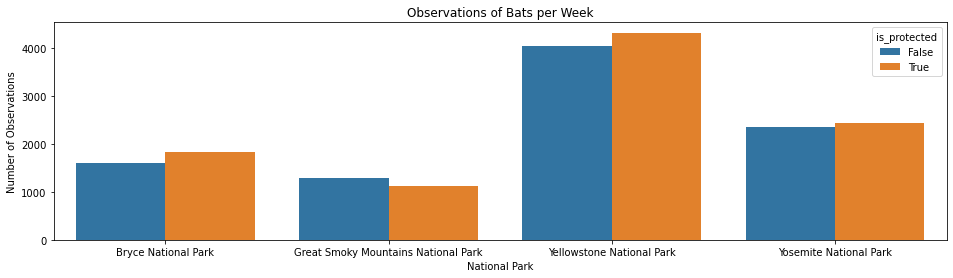

In [117]:
plt.figure(figsize=(16, 4))
sns.barplot(
    x = obs_by_park.park_name,
    y = obs_by_park.observations,
    hue = obs_by_park.is_protected)
plt.xlabel('National Park')
plt.ylabel('Number of Observations')
plt.title('Observations of Bats per Week')

## Conclusions

We made several visualizations and derived new insights into the
species available in the data of these four National Parks.

Lets look again at the questions we seeked to answer at the start of this project:
- What is the distribution of conservation status for our available species?
    - Most of the species were not of conservation status (5,633 vs. 191)
- Are certain species more likely to be endangered?
    - Birds and Mammals had the highest protection percentage.
- If differences exist between species and their conservation status, is it significant?
    - Reptiles and Mammals have a significant difference in protected status,
    while Mammals and Birds do not show such a difference.
- What are the most prevalent species and what is their park distribution?
    - The most prevalence species is bats, and they have the highest prevalency
    in Yellowstone National Park.

## Further Research


Further analyses could include larger datasets (such as observations from
older than the past week) and look at the change in specie's protection
over time.
This dataset also is ignorant of the size of each park, which likely has
a correlation with the prevalence of species observed.
Finally, if we had location data of each observation we could make correlations
between species observations and their spatial distribution.

#### Data sources
Both csv files (`Observations.csv`, `Species_info.csv`) 
 were provided by [Codecademy.com](https://www.codecademy.com).